In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [3]:
music_df=pd.read_csv("/Users/raphoun/Documents/GitHub/Project3_group/Project-4/Data/tenyear.csv")
music_df.head()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,7054,0.022200,['Tame Impala'],0.450,362880,0.849,0,4m3GHOgCNZMv0we7H9j8Y8,0.00455,5,0.0792,-5.075,1,Expectation,48,2010-05-21,0.0570,139.925,0.1610,2010
1,7055,0.000103,['Bring Me The Horizon'],0.382,274133,0.943,0,0ZxZsjMMyLgjRV1XLWlIaS,0.00011,8,0.3960,-5.434,1,It Never Ends,50,2010-10-05,0.0872,105.032,0.1280,2010
2,7056,0.852000,['Daft Punk'],0.179,162120,0.167,0,0Jc2SfIHv63JNsUZpunh54,0.74800,1,0.1060,-23.408,1,Solar Sailer,48,2010-01-01,0.0394,124.266,0.0399,2010
3,7057,0.080900,['TobyMac'],0.507,266547,0.770,0,5QZunYrvUrJs3Mzrjl7fKV,0.00000,0,0.2140,-5.018,1,City On Our Knees,48,2010-02-05,0.0424,155.945,0.4820,2010
4,7058,0.002960,['Kenny Chesney'],0.315,210640,0.925,0,0X0zDB7RqpWOIwCHGr2Whu,0.06420,0,0.1140,-4.507,1,Reality,47,2010-09-28,0.1170,185.305,0.4150,2010


test 

/Users/raphoun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/raphoun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/raphoun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

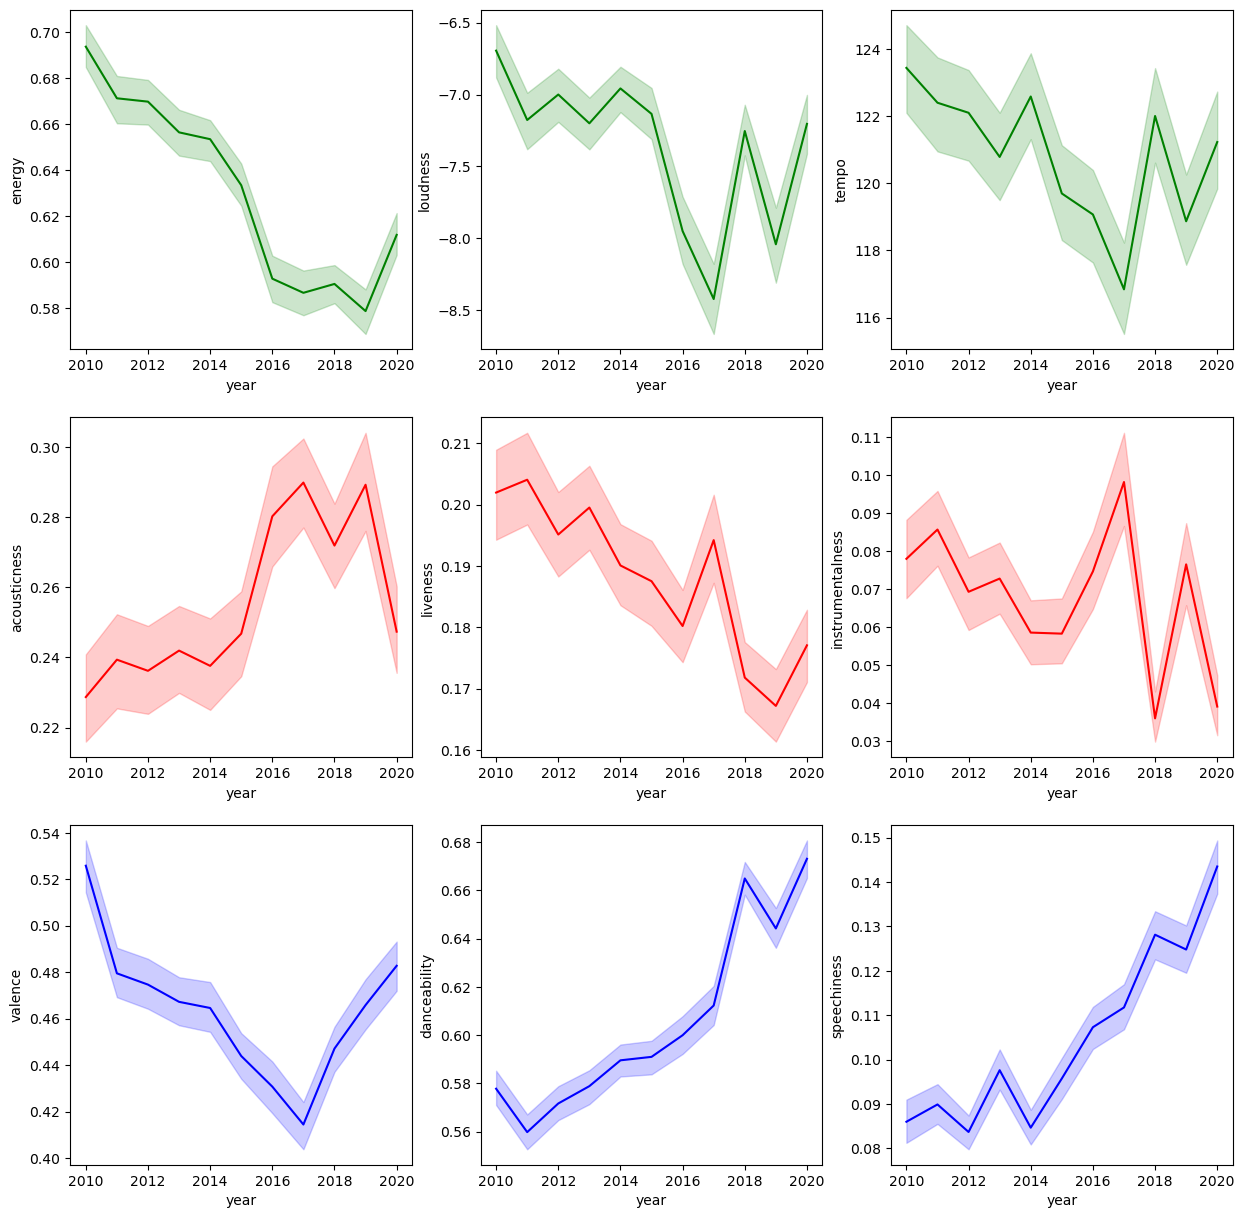

In [4]:
import seaborn as sns

fig , axes = plt.subplots(3,3,figsize=(15,15))
sns.lineplot(music_df['year'],music_df['energy'],color='g',ax=axes[0,0])
sns.lineplot(music_df['year'],music_df['loudness'],color='g',ax=axes[0,1])
sns.lineplot(music_df['year'],music_df['tempo'],color='g',ax=axes[0,2])
sns.lineplot(music_df['year'],music_df['acousticness'],color='r',ax=axes[1,0])
sns.lineplot(music_df['year'],music_df['liveness'],color='r',ax=axes[1,1])
sns.lineplot(music_df['year'],music_df['instrumentalness'],color='r',ax=axes[1,2])
sns.lineplot(music_df['year'],music_df['valence'],color='b',ax=axes[2,0])
sns.lineplot(music_df['year'],music_df['danceability'],color='b',ax=axes[2,1])
sns.lineplot(music_df['year'],music_df['speechiness'],color='b',ax=axes[2,2])
plt.show()

Most popular artist each year

/Users/raphoun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, "['Taylor Swift']"),
  Text(1, 0, "['BTS']"),
  Text(2, 0, "['Drake']"),
  Text(3, 0, "['One Direction']"),
  Text(4, 0, "['Mac Miller']"),
  Text(5, 0, "['The Weeknd']"),
  Text(6, 0, "['Lil Uzi Vert']"),
  Text(7, 0, "['Lana Del Rey']"),
  Text(8, 0, "['YoungBoy Never Broke Again']"),
  Text(9, 0, "['NF']")])

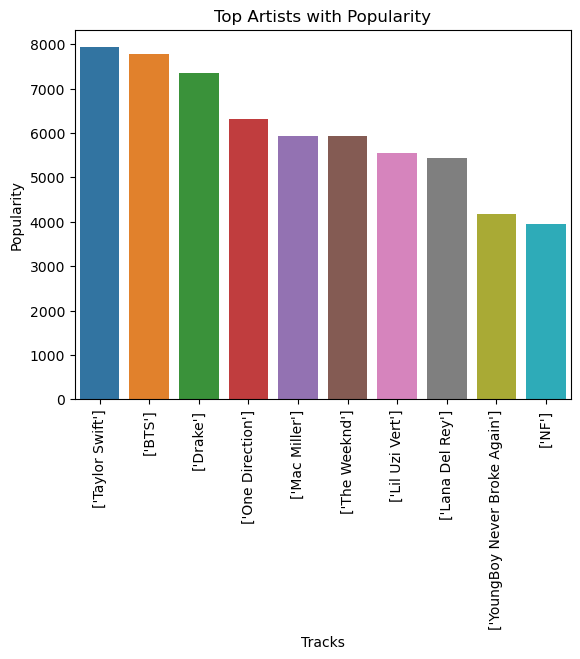

In [5]:
popularity= (music_df.groupby('artists').sum()['popularity'].sort_values(ascending=False).head(10))
# Top 10 artist

ax = sns.barplot(popularity.index, popularity)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Tracks')
plt.xticks(rotation = 90)

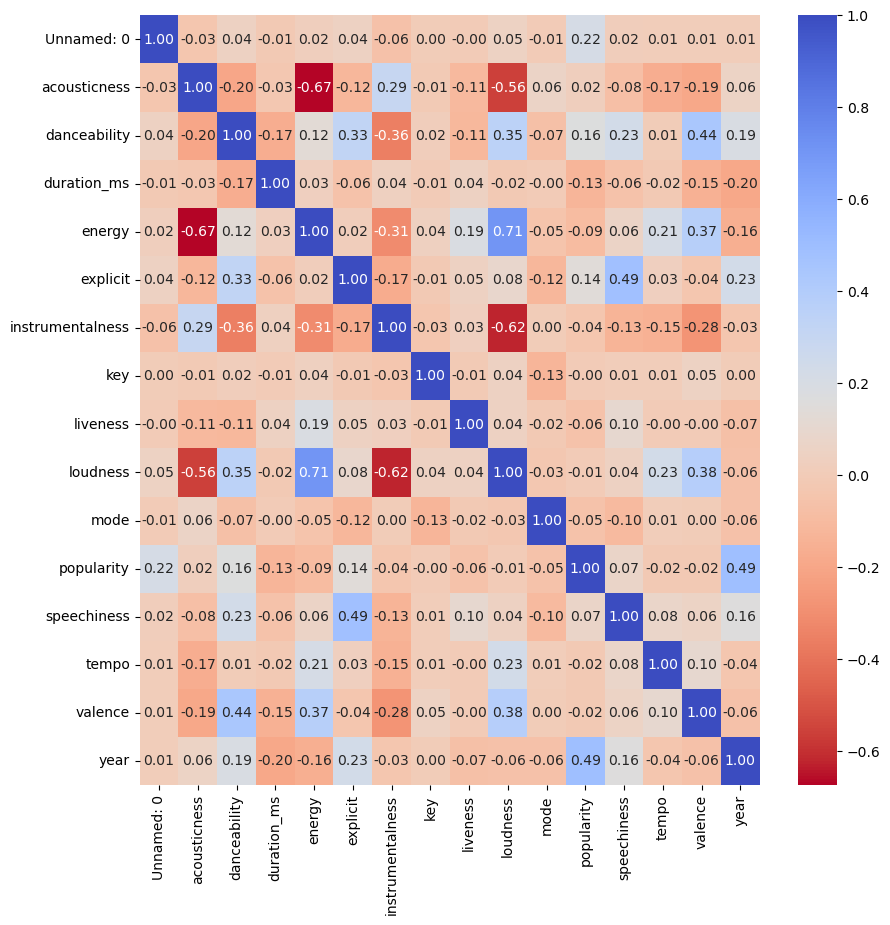

In [16]:
#Correlation between attributes
corr_mat = music_df.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr_mat,
            annot=True,
            fmt='.2f',
            cmap=plt.cm.coolwarm_r,
           )
plt.show()

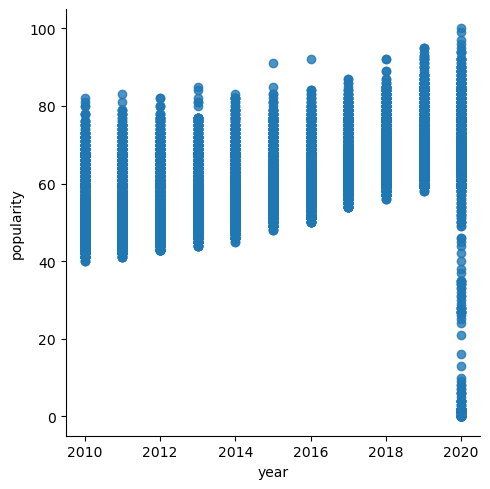

In [7]:
#scatter
sns.lmplot(data = music_df , x = 'year',y = 'popularity',fit_reg = False)
plt.show()

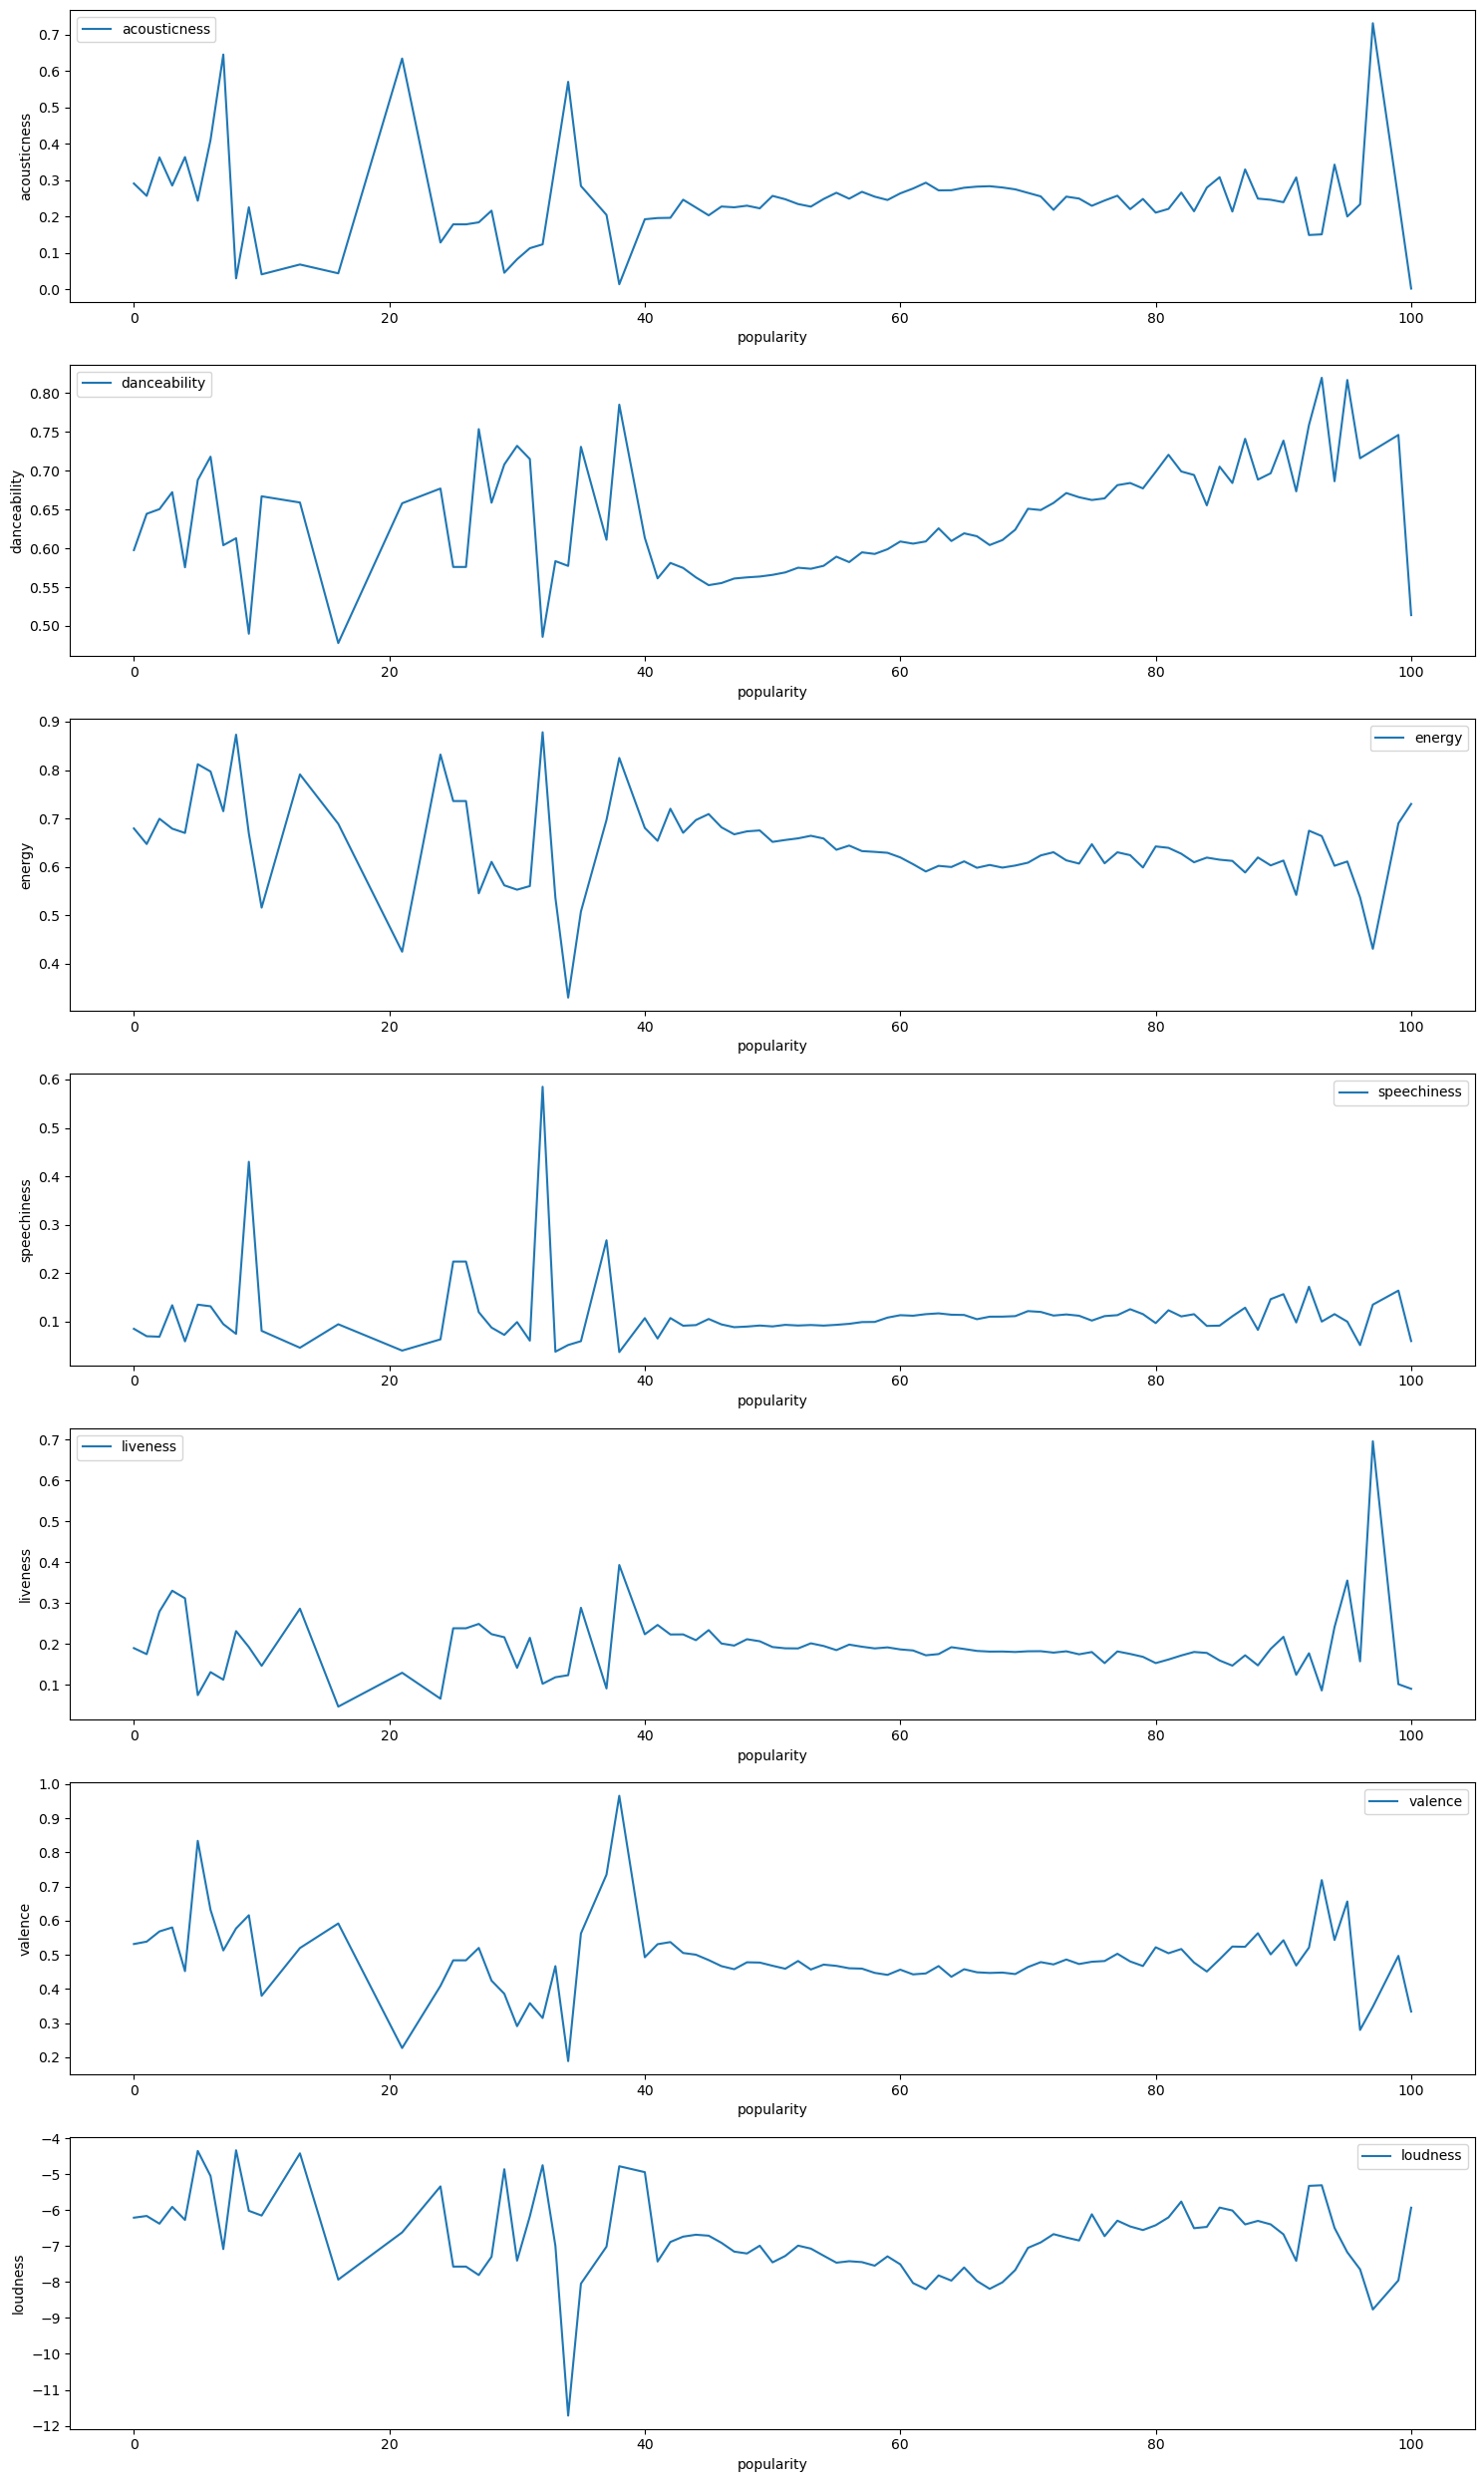

In [8]:
fig, ax = plt.subplots(7, 1, figsize = (15, 25))
columns = ["acousticness","danceability","energy","speechiness","liveness","valence", "loudness"]
i = 0
for col in columns:
    x = music_df.groupby("popularity")[col].mean()
    sns.lineplot(x=x.index,y=x,label=col, ax = ax[i])
    i += 1
plt.tight_layout()

<AxesSubplot:xlabel='instrumentalness', ylabel='popularity'>

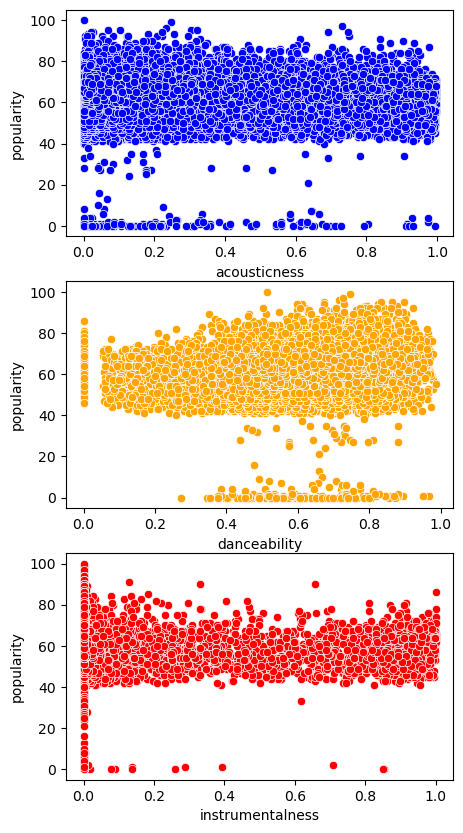

In [9]:
fig, ax =plt.subplots(3,1, figsize=(5,10))
sns.scatterplot(x = music_df['acousticness'], y = music_df['popularity'], ax = ax[0], color = "blue")
sns.scatterplot(x = music_df['danceability'], y = music_df['popularity'], ax = ax[1], color = "orange")
sns.scatterplot(x = music_df['instrumentalness'], y = music_df['popularity'], ax = ax[2], color = "red")


<AxesSubplot:xlabel='duration_ms', ylabel='popularity'>

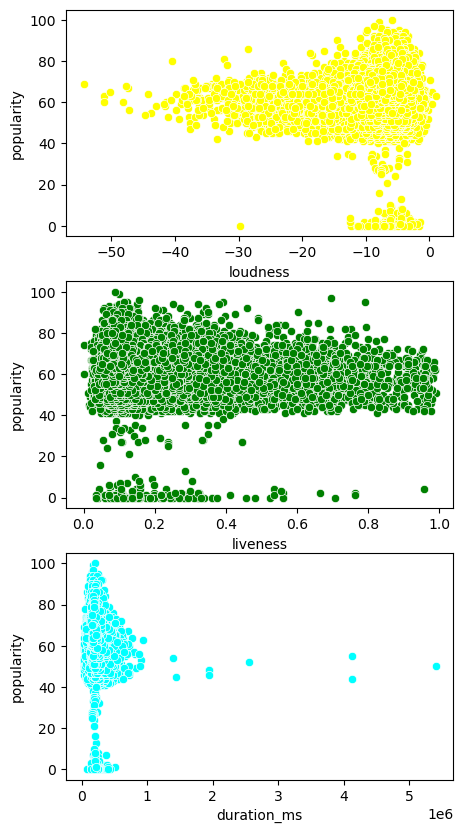

In [10]:
fig, ax =plt.subplots(3,1, figsize=(5,10))
sns.scatterplot(x = music_df['loudness'], y = music_df['popularity'], ax = ax[0], color = "yellow")
sns.scatterplot(x = music_df['liveness'], y = music_df['popularity'], ax = ax[1], color = "green")
sns.scatterplot(x = music_df['duration_ms'], y = music_df['popularity'], ax = ax[2], color = "cyan")

<AxesSubplot:xlabel='valence', ylabel='popularity'>

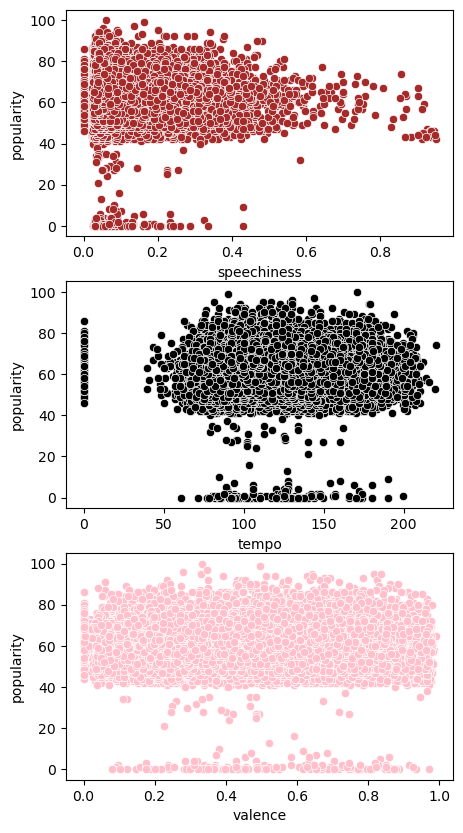

In [11]:
fig, ax =plt.subplots(3,1, figsize=(5,10))
sns.scatterplot(x = music_df['speechiness'], y = music_df['popularity'], ax = ax[0], color = "brown")
sns.scatterplot(x = music_df['tempo'], y = music_df['popularity'], ax = ax[1], color = "black")
sns.scatterplot(x = music_df['valence'], y = music_df['popularity'], ax = ax[2], color = "pink")

Locator attempting to generate 3049 ticks ([-57.160000000000004, ..., 3.799999999999997]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3049 ticks ([-57.160000000000004, ..., 3.799999999999997]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3049 ticks ([-57.160000000000004, ..., 3.799999999999997]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3049 ticks ([-57.160000000000004, ..., 3.799999999999997]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3049 ticks ([-57.160000000000004, ..., 3.799999999999997]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3049 ticks ([-57.160000000000004, ..., 3.799999999999997]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3049 ticks ([-57.160000000000004, ..., 3.799999999999997]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3049 ticks ([-57.160000000000004, ..., 3.799999999999997]),

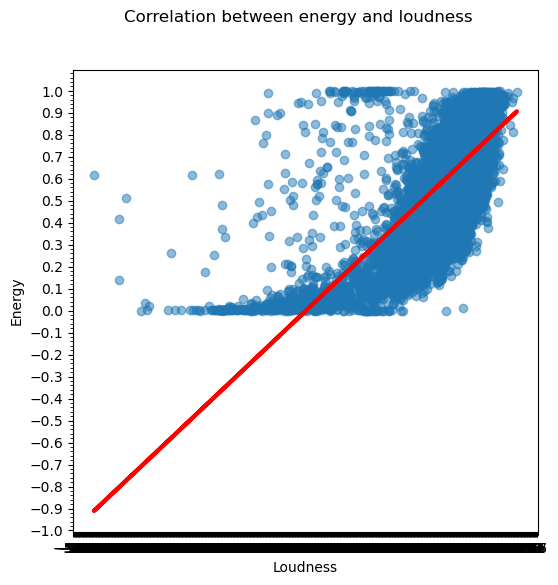

In [12]:
from sklearn import datasets, linear_model
import matplotlib.ticker as ticker

x = music_df["loudness"].values
y = music_df["energy"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between energy and loudness")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("Loudness")
plt.ylabel("Energy")

plt.show()

Locator attempting to generate 1103 ticks ([-5.1, ..., 105.10000000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1103 ticks ([-5.1, ..., 105.10000000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5503 ticks ([-5.02, ..., 105.02000000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1103 ticks ([-5.1, ..., 105.10000000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1103 ticks ([-5.1, ..., 105.10000000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5503 ticks ([-5.02, ..., 105.02000000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1103 ticks ([-5.1, ..., 105.10000000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1103 ticks ([-5.1, ..., 105.10000000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5503 ticks ([-5.02, ..., 105.0200000000

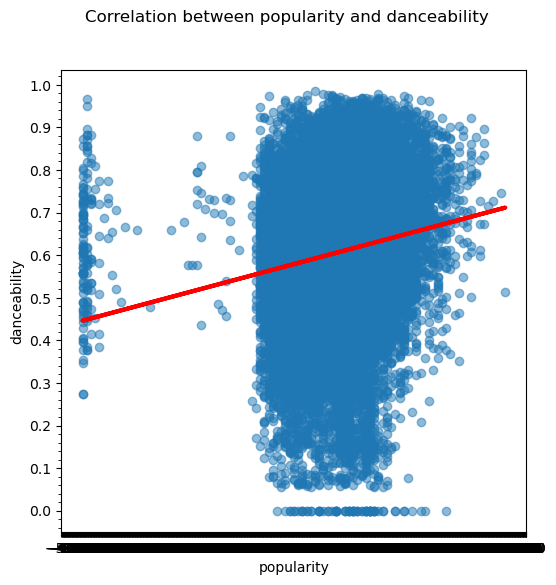

In [13]:
x = music_df["popularity"].values
y = music_df["danceability"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between popularity and danceability")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("popularity")
plt.ylabel("danceability")

plt.show()